In [1]:
import os 
import pickle

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from collections import Counter

In [2]:
# Load frame change path if necessary for annotated_frame.pkl
path = '/home/adm_gpu/projects/masterthesis/code/main/annotated_frame.pkl'
with open(path, 'rb') as f:
    annotations = pickle.load(f)

In [3]:
annotations.head()

,journal,date,image,information,text,background,person
0,MacWorld,2000-01-01,<PIL.Image.Image image mode=RGB size=556x748 a...,[book],0.3596,0.9992,0.0000
1,MacWorld,2000-01-01,<PIL.Image.Image image mode=RGB size=558x756 a...,[],0.8635,0.9972,0.0000
2,MacWorld,2000-01-01,<PIL.Image.Image image mode=RGB size=554x755 a...,"[person, person, apple, apple, dining table, b...",0.1051,0.3943,0.2151
3,MacWorld,2000-01-01,<PIL.Image.Image image mode=RGB size=558x757 a...,"[cup, cup, cell phone]",0.1750,0.9324,0.0000
4,MacWorld,2000-01-01,<PIL.Image.Image image mode=RGB size=554x756 a...,[tie],0.6770,0.9781,0.0000


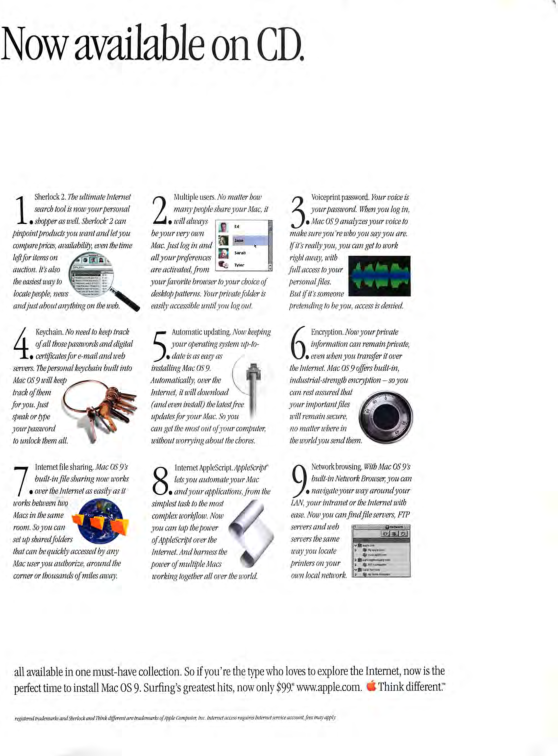

In [15]:
annotations.iloc[1]['image']

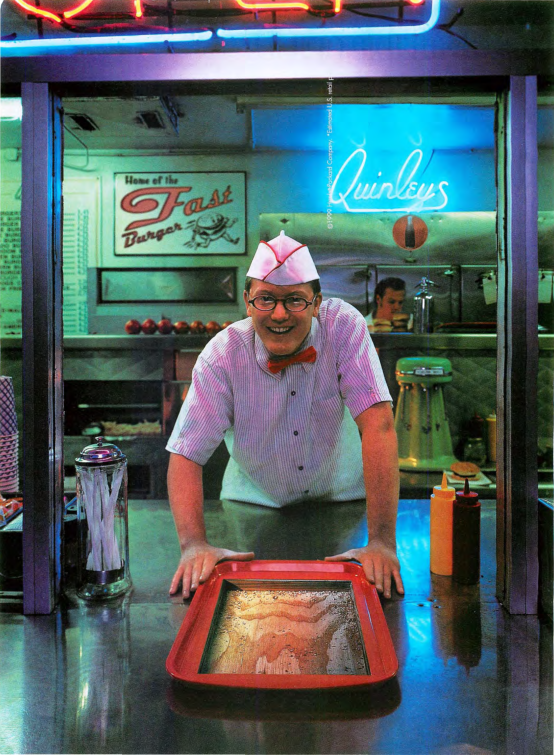

In [11]:
annotations.iloc[2]['image']

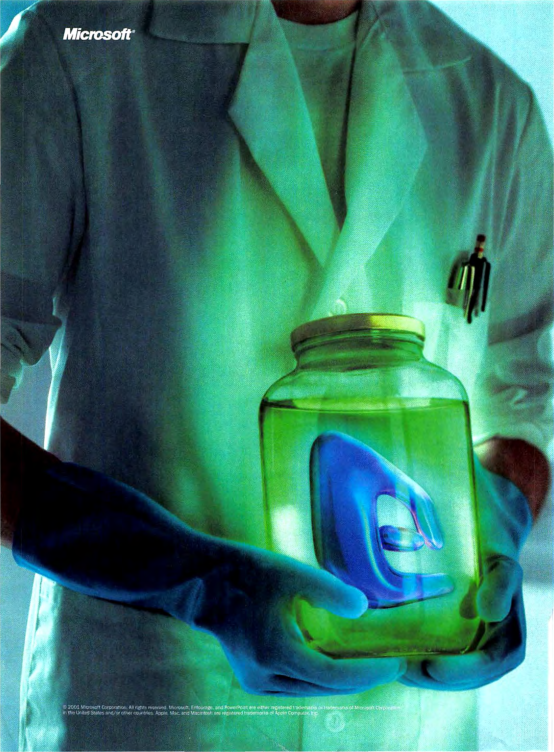

In [14]:
annotations.iloc[annotations['person'].idxmax()]['image']

## Descriptive measures

In [18]:
work = annotations.copy()
work['year'] = work['date'].dt.year

In [7]:
work['year'].max()

2005

In [23]:



all_strings = [item for sublist in work['information'] for item in sublist]

frequency_counts = Counter(all_strings)

frequency_df = pd.DataFrame(frequency_counts.items(), columns=['String', 'Frequency']).sort_values(by='Frequency', ascending=False).reset_index(drop=True)

frequency_df.head(10)



,String,Frequency
0,person,2055
1,book,1750
2,tv,747
3,keyboard,392
4,cell phone,286
5,laptop,284
6,chair,235
7,tie,159
8,mouse,130
9,bottle,75


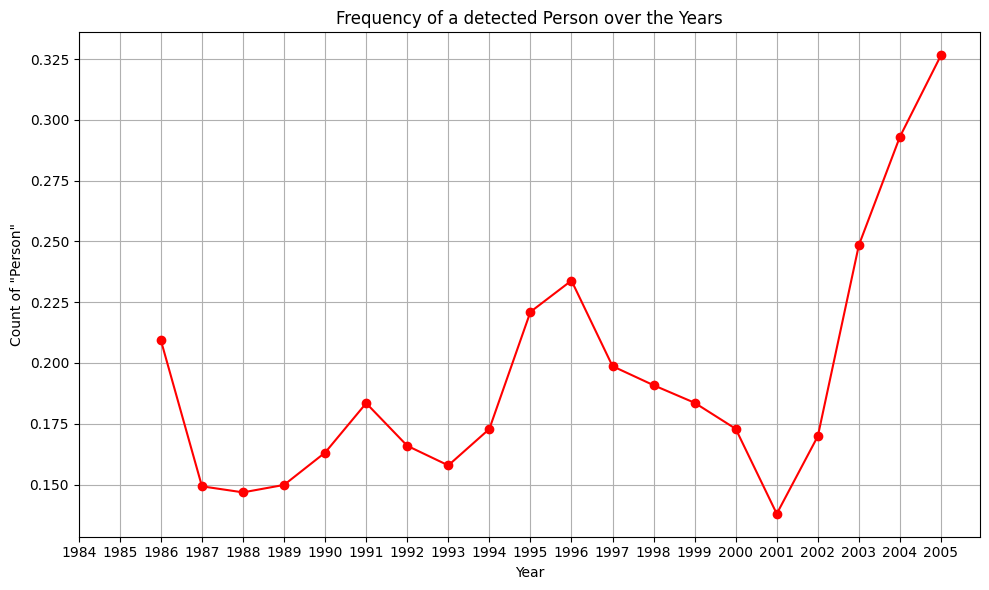

In [16]:
# Calculate occurrences of the term "person" and total word count for each entry
work['person_count'] = work['information'].apply(lambda x: x.count('person'))
work['total_words'] = work['information'].apply(lambda x: len(x))

# Calculate the relative frequency of "person" per entry
work['person_relative_frequency'] = work['person_count'] / work['total_words']

# Aggregate relative frequencies by year
# Here, we can use mean() to get the average relative frequency for each year
person_relative_by_year = work.groupby('year')['person_relative_frequency'].mean().reset_index()

# Calculate the moving average on the relative frequency with a window size of 3 years
window_size = 3
person_relative_by_year['moving_average'] = person_relative_by_year['person_relative_frequency'].rolling(window=window_size).mean()


# Plot: Occurrences of the Term "Person" Over the Years
plt.figure(figsize=(10, 6))
#plt.plot(person_relative_by_year['year'], person_relative_by_year['person_relative_frequency'], marker='o', linestyle='-', label='Count of "Person"')
plt.plot(person_relative_by_year['year'], person_relative_by_year['moving_average'], marker='o', linestyle='-', color='red', label=f'{window_size}-Year Moving Average')
plt.title('Frequency of a detected Person over the Years')
plt.xlabel('Year')
plt.ylabel('Count of "Person"')
plt.grid(True)
plt.xticks(person_relative_by_year['year'])  # Ensure all years are shown on x-axis
plt.tight_layout()
plt.show()


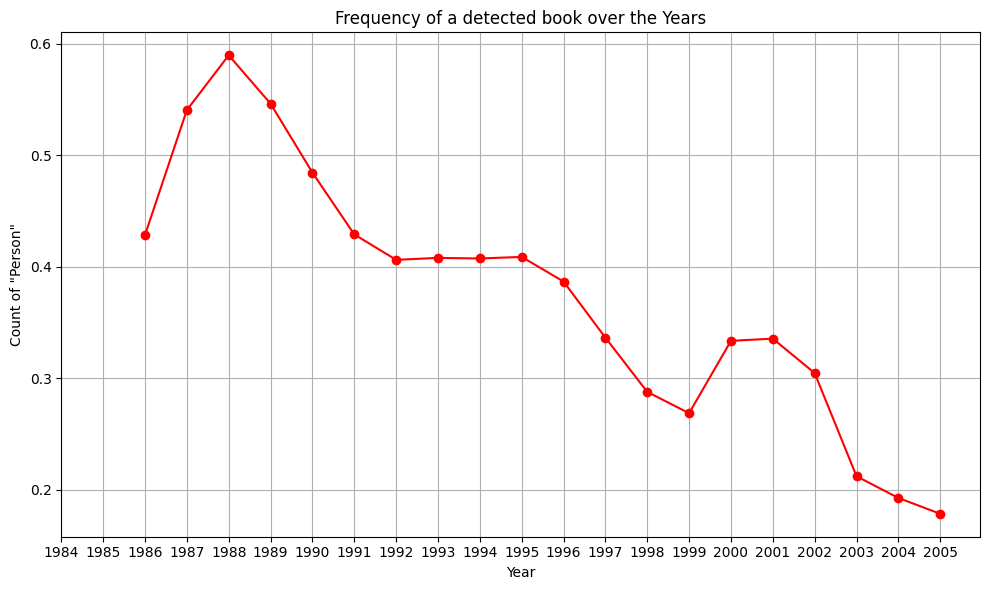

In [19]:
# Calculate occurrences of the term "person" and total word count for each entry
work['book_count'] = work['information'].apply(lambda x: x.count('book'))

# Calculate the relative frequency of "person" per entry
work['book_relative_frequency'] = work['book_count'] / work['total_words']

# Aggregate relative frequencies by year
# Here, we can use mean() to get the average relative frequency for each year
person_relative_by_year = work.groupby('year')['book_relative_frequency'].mean().reset_index()

# Calculate the moving average on the relative frequency with a window size of 3 years
window_size = 3
person_relative_by_year['moving_average'] = person_relative_by_year['book_relative_frequency'].rolling(window=window_size).mean()


# Plot: Occurrences of the Term "Person" Over the Years
plt.figure(figsize=(10, 6))
#plt.plot(person_relative_by_year['year'], person_relative_by_year['person_relative_frequency'], marker='o', linestyle='-', label='Count of "Person"')
plt.plot(person_relative_by_year['year'], person_relative_by_year['moving_average'], marker='o', linestyle='-', color='red', label=f'{window_size}-Year Moving Average')
plt.title('Frequency of a detected book over the Years')
plt.xlabel('Year')
plt.ylabel('Count of "book"')
plt.grid(True)
plt.xticks(person_relative_by_year['year'])  # Ensure all years are shown on x-axis
plt.tight_layout()
plt.show()

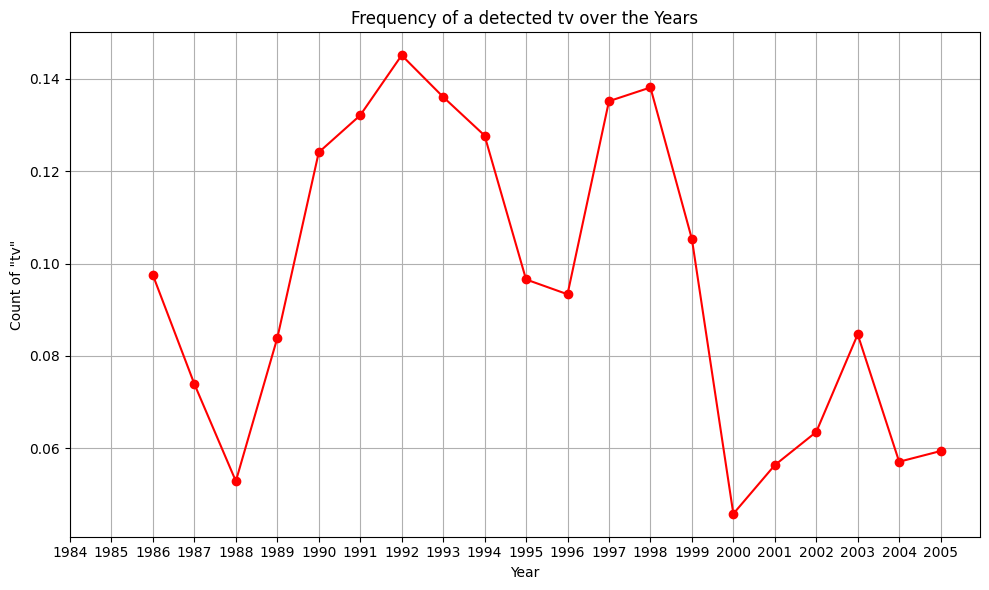

In [24]:


# Calculate occurrences of the term "person" and total word count for each entry
work['tv_count'] = work['information'].apply(lambda x: x.count('tv'))

# Calculate the relative frequency of "person" per entry
work['tv_relative_frequency'] = work['tv_count'] / work['total_words']

# Aggregate relative frequencies by year
# Here, we can use mean() to get the average relative frequency for each year
person_relative_by_year = work.groupby('year')['tv_relative_frequency'].mean().reset_index()

# Calculate the moving average on the relative frequency with a window size of 3 years
window_size = 3
person_relative_by_year['moving_average'] = person_relative_by_year['tv_relative_frequency'].rolling(window=window_size).mean()


# Plot: Occurrences of the Term "Person" Over the Years
plt.figure(figsize=(10, 6))
#plt.plot(person_relative_by_year['year'], person_relative_by_year['person_relative_frequency'], marker='o', linestyle='-', label='Count of "Person"')
plt.plot(person_relative_by_year['year'], person_relative_by_year['moving_average'], marker='o', linestyle='-', color='red', label=f'{window_size}-Year Moving Average')
plt.title('Frequency of a detected tv over the Years')
plt.xlabel('Year')
plt.ylabel('Count of "tv"')
plt.grid(True)
plt.xticks(person_relative_by_year['year'])  # Ensure all years are shown on x-axis
plt.tight_layout()
plt.show()

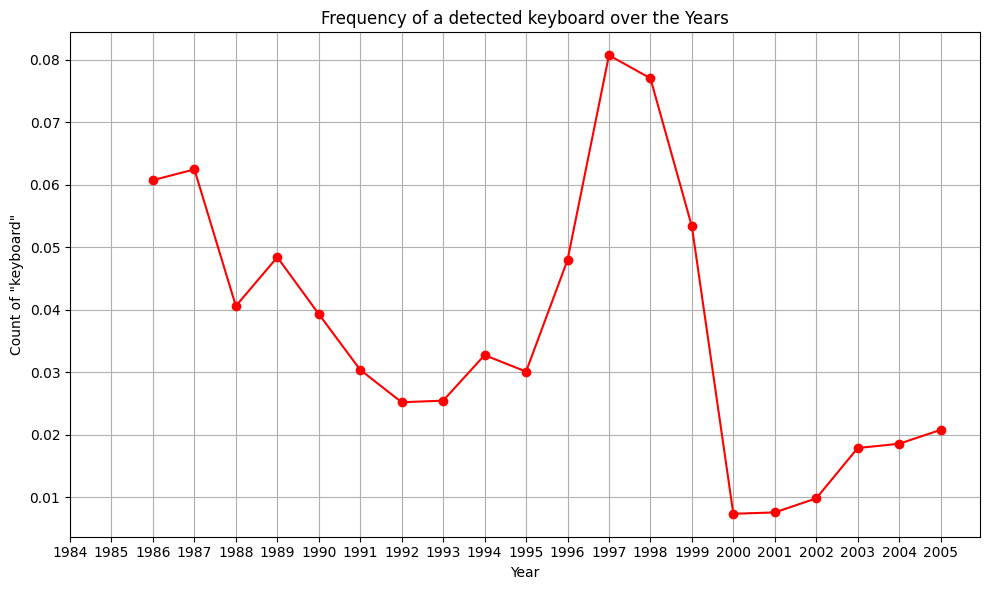

In [25]:


# Calculate occurrences of the term "person" and total word count for each entry
work['keyboard_count'] = work['information'].apply(lambda x: x.count('keyboard'))

# Calculate the relative frequency of "person" per entry
work['keyboard_relative_frequency'] = work['keyboard_count'] / work['total_words']

# Aggregate relative frequencies by year
# Here, we can use mean() to get the average relative frequency for each year
person_relative_by_year = work.groupby('year')['keyboard_relative_frequency'].mean().reset_index()

# Calculate the moving average on the relative frequency with a window size of 3 years
window_size = 3
person_relative_by_year['moving_average'] = person_relative_by_year['keyboard_relative_frequency'].rolling(window=window_size).mean()


# Plot: Occurrences of the Term "Person" Over the Years
plt.figure(figsize=(10, 6))
#plt.plot(person_relative_by_year['year'], person_relative_by_year['person_relative_frequency'], marker='o', linestyle='-', label='Count of "Person"')
plt.plot(person_relative_by_year['year'], person_relative_by_year['moving_average'], marker='o', linestyle='-', color='red', label=f'{window_size}-Year Moving Average')
plt.title('Frequency of a detected keyboard over the Years')
plt.xlabel('Year')
plt.ylabel('Count of "keyboard"')
plt.grid(True)
plt.xticks(person_relative_by_year['year'])  # Ensure all years are shown on x-axis
plt.tight_layout()
plt.show()

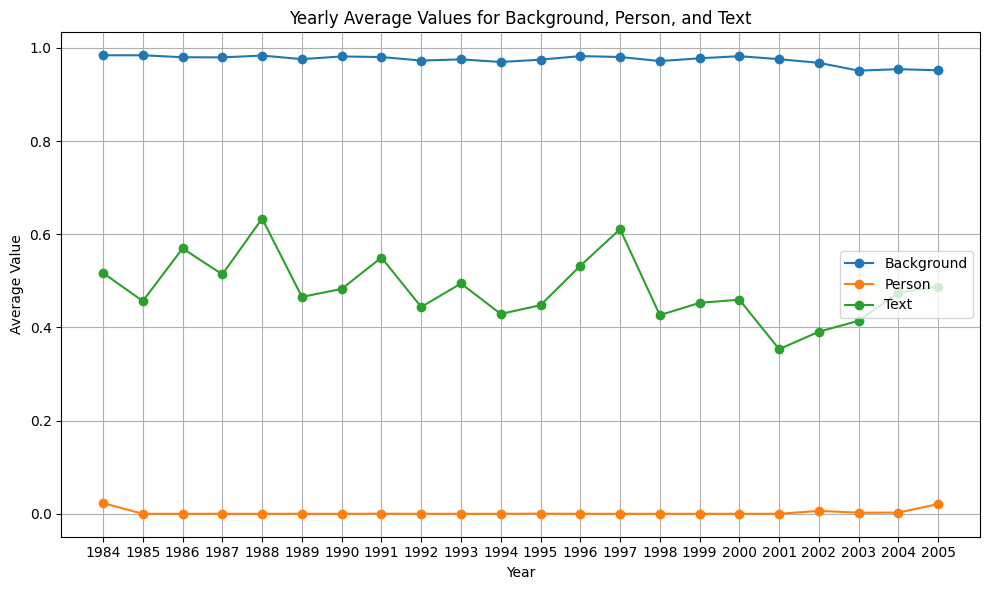

In [29]:

# yearly averages for clip annotation 
yearly_averages = work.groupby('year')[['background', 'person', 'text']].median().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_averages['year'], yearly_averages['background'], marker='o', linestyle='-', label='Background')
plt.plot(yearly_averages['year'], yearly_averages['person'], marker='o', linestyle='-', label='Person')
plt.plot(yearly_averages['year'], yearly_averages['text'], marker='o', linestyle='-', label='Text')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Yearly Average Values for Background, Person, and Text')
plt.legend()
plt.grid(True)
plt.xticks(yearly_averages['year'])  # Show each year on the x-axis
plt.tight_layout()
plt.show()

## Modeling 

In [19]:
org =  work[['year', 'information', 'text', 'background', 'person']]
org.head()

,year,information,text,background,person
0,2000,[book],0.3596,0.9992,0.0000
1,2000,[],0.8635,0.9972,0.0000
2,2000,"[person, person, apple, apple, dining table, b...",0.1051,0.3943,0.2151
3,2000,"[cup, cup, cell phone]",0.1750,0.9324,0.0000
4,2000,[tie],0.6770,0.9781,0.0000


In [21]:
# we only want to look at keywords with high occurences 
dummies = org.copy()

keywords = ['person', 'book', 'tv', 'keyboard']

for keyword in keywords:
    dummies[f'mask_{keyword}'] = dummies['information'].apply(lambda x: 1 if keyword in x else 0)


In [25]:
cleaned = dummies.drop(['information'], axis = 1)
cleaned.head()

In [27]:
Y = cleaned[['year']]
X = cleaned.drop(['year'], axis = 1)

Y.head()

,year
0,2000
1,2000
2,2000
3,2000
4,2000


In [28]:
X.head()

,text,background,person,mask_person,mask_book,mask_tv,mask_keyboard
0,0.3596,0.9992,0.0000,0,1,0,0
1,0.8635,0.9972,0.0000,0,0,0,0
2,0.1051,0.3943,0.2151,1,0,0,0
3,0.1750,0.9324,0.0000,0,0,0,0
4,0.6770,0.9781,0.0000,0,0,0,0


In [33]:
import xgboost as xgb
import shap

import pandas as pd
import matplotlib.pyplot as plt

dtrain = xgb.DMatrix(X, label=Y)

In [31]:
dtrain

In [32]:
params = {
    'objective': 'reg:squarederror',  # Objective for regression; change if year prediction is classification
    'max_depth': 3,
    'eta': 0.1
}

# Train the XGBoost model
num_boost_round = 100
model = xgb.train(params, dtrain, num_boost_round=num_boost_round)

<Figure size 640x480 with 0 Axes>

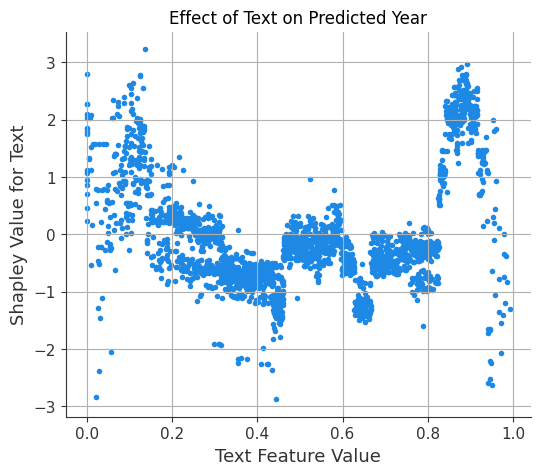

<Figure size 640x480 with 0 Axes>

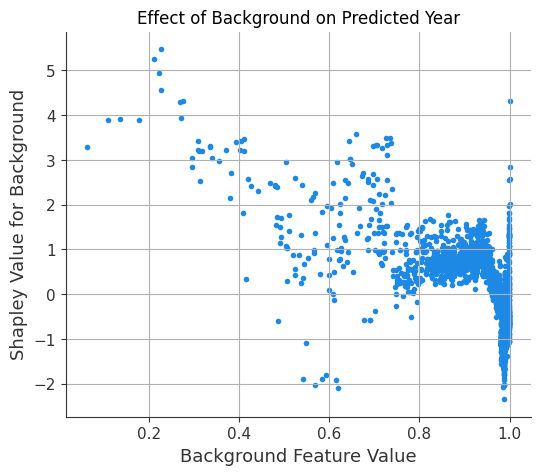

<Figure size 640x480 with 0 Axes>

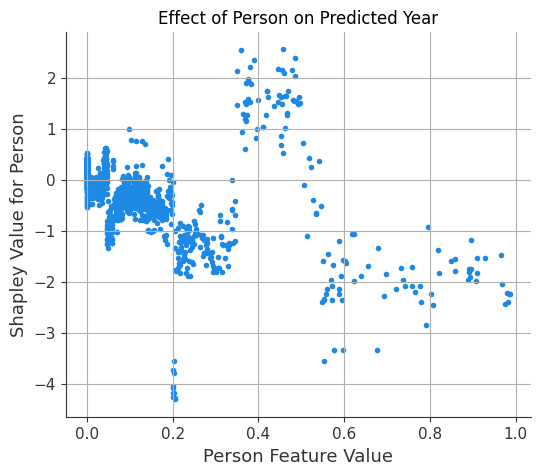

In [38]:


explainer = shap.Explainer(model, X)


shap_values = explainer(X)


for feature in ['text', 'background', 'person']:
    plt.figure()
    shap.dependence_plot(
        feature, shap_values.values, X, interaction_index=None, show=False
    )
    
    # Customize plot labels and title
    plt.xlabel(f'{feature.capitalize()} Feature Value')
    plt.ylabel(f'Shapley Value for {feature.capitalize()}')
    plt.title(f'Effect of {feature.capitalize()} on Predicted Year')
    
    plt.grid(True)
    plt.tight_layout()

    # Save the plot if needed
    plt.savefig(f'shap_dependence_{feature}.png', dpi=300, bbox_inches='tight')
    
    # Show plot
    plt.show()

<Figure size 640x480 with 0 Axes>

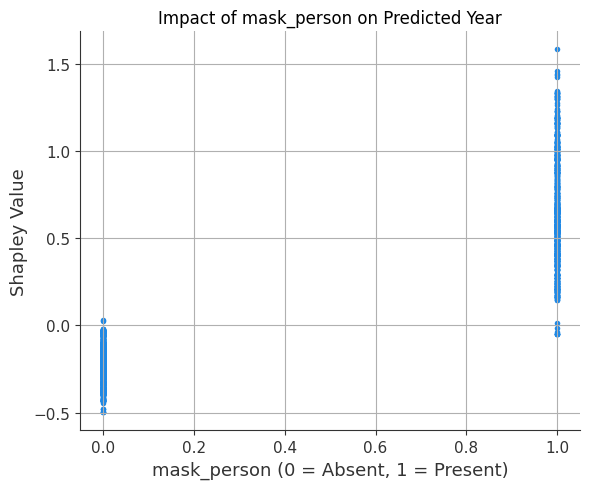

<Figure size 640x480 with 0 Axes>

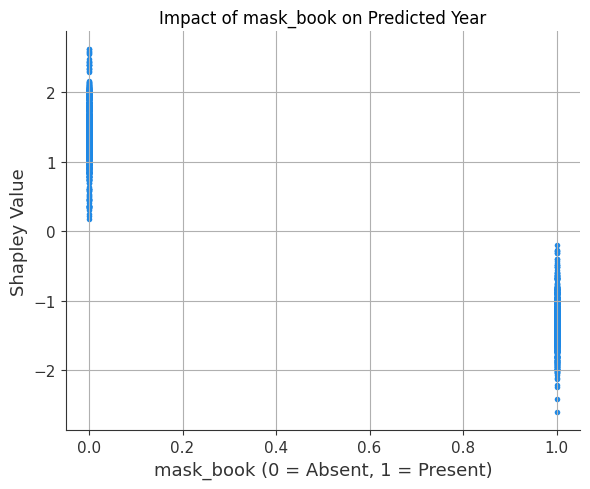

<Figure size 640x480 with 0 Axes>

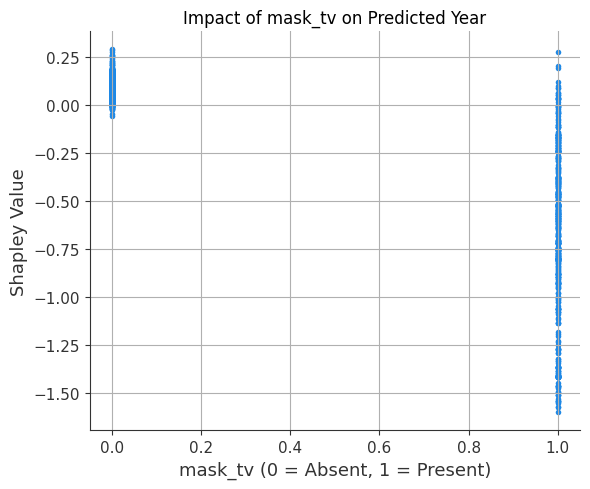

<Figure size 640x480 with 0 Axes>

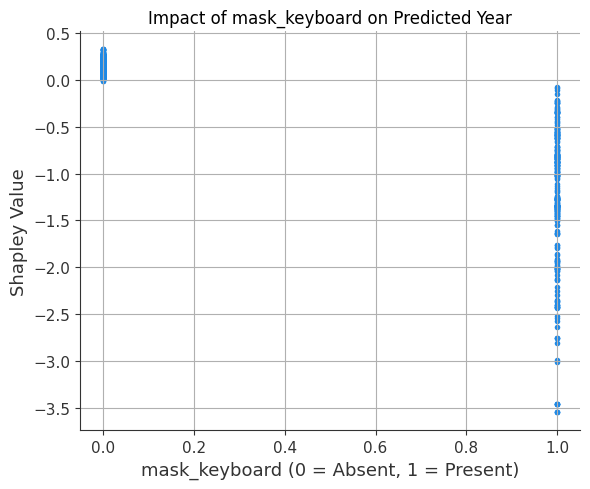

In [39]:
dummy_variables = ['mask_person', 'mask_book', 'mask_tv', 'mask_keyboard']

for dummy in dummy_variables:
    plt.figure()
    shap.dependence_plot(dummy, shap_values.values, X, interaction_index=None, show=False)
    
    # Customize labels and title for clarity
    plt.xlabel(f'{dummy} (0 = Absent, 1 = Present)')
    plt.ylabel('Shapley Value')
    plt.title(f'Impact of {dummy} on Predicted Year')

    plt.grid(True)
    plt.tight_layout()
    
    # Show or save the plot as needed
    plt.savefig(f'shap_dependence_{dummy}.png', dpi=300, bbox_inches='tight')
    plt.show()